In [4]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
df.drop('employee_id',axis=1,inplace=True)

In [3]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
df['is_promoted'].value_counts()/df.shape[0]*100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

#### Since the class ratio is very less and not following 70-30 rule so we would consider it as an imbalenced dataset and treat accordingly

# Univariate analysis

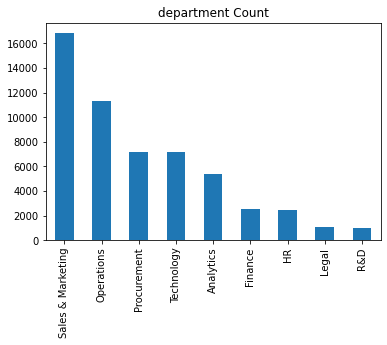

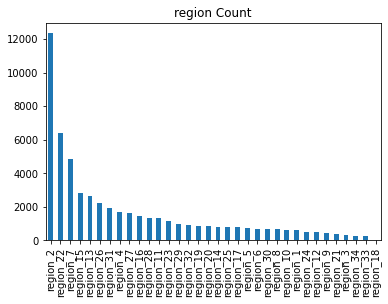

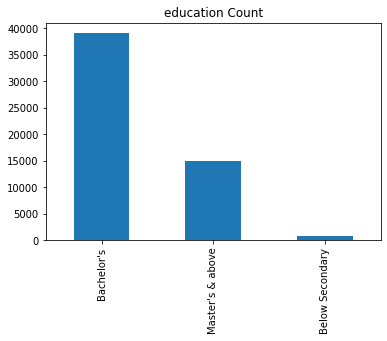

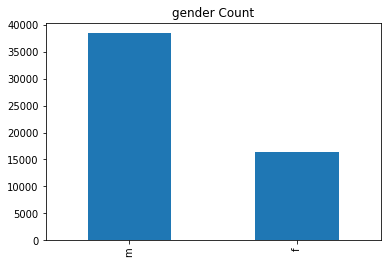

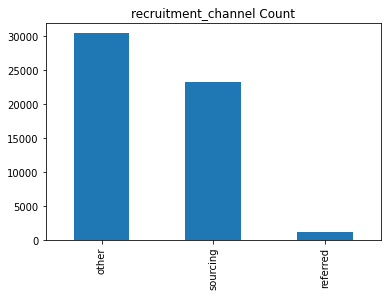

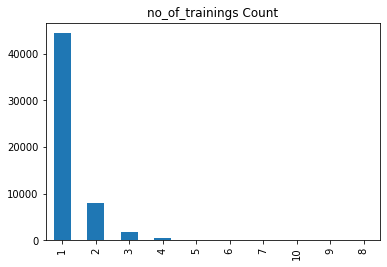

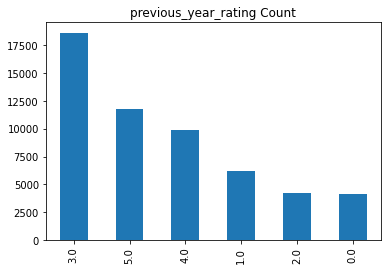

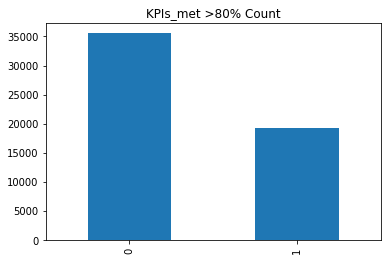

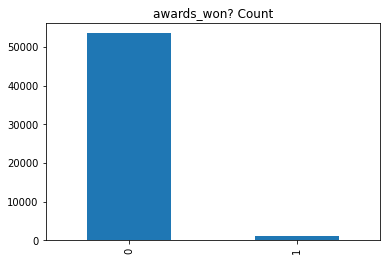

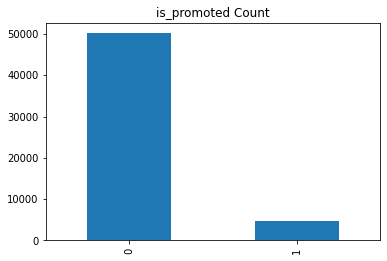

In [11]:
cate_feat=['department', 'region', 'education', 'gender', 'recruitment_channel','no_of_trainings','previous_year_rating',
        'KPIs_met >80%', 'awards_won?', 'is_promoted']
import matplotlib.pyplot as plt
import seaborn as sns
for i in cate_feat:
    plt.title(i+' Count')
    df[i].value_counts().plot(kind="bar")
    plt.show()

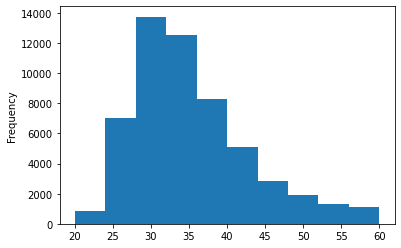

In [44]:
df['age'].plot(kind='hist')

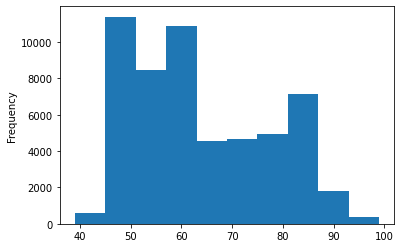

In [45]:
df['avg_training_score'].plot(kind='hist')

# Multivariate analysis

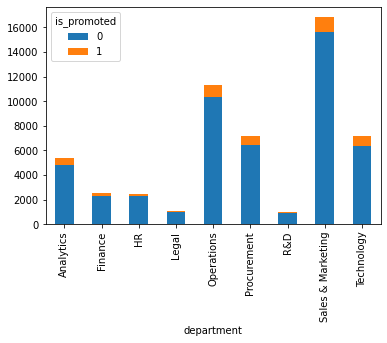

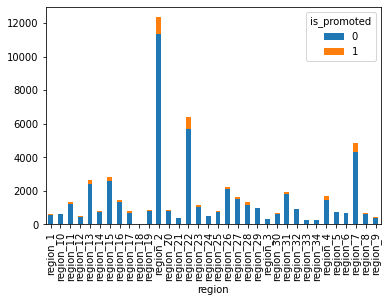

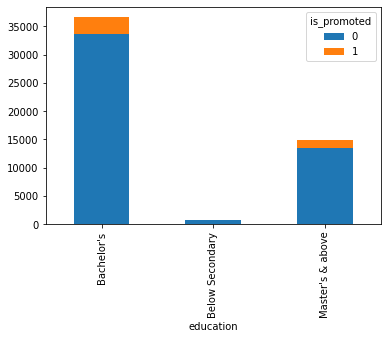

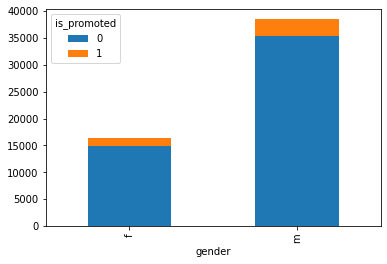

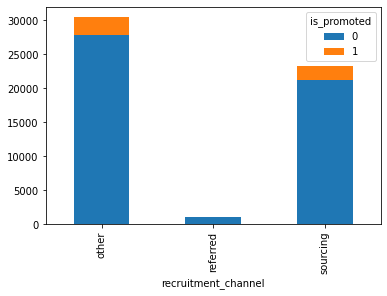

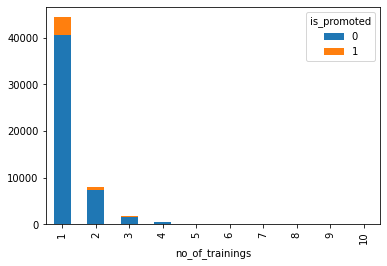

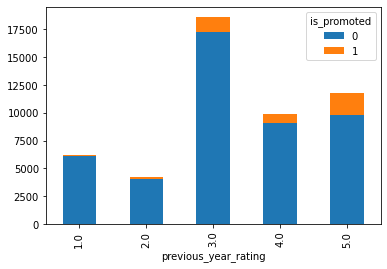

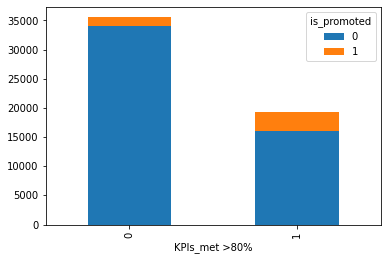

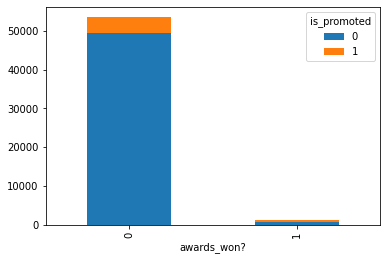

In [23]:
for i in cate_feat[:-1]:
    df.groupby(i)['is_promoted'].value_counts().unstack().plot(kind='bar',stacked=True)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


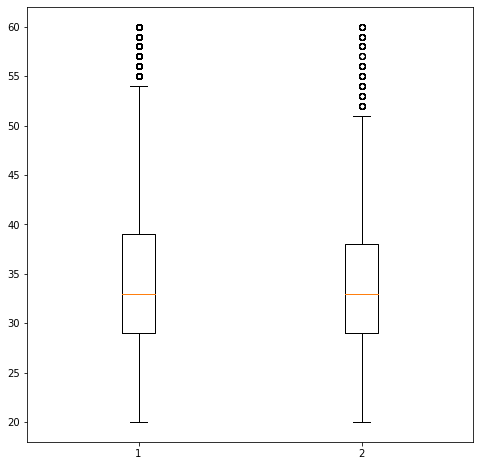

In [8]:
import numpy as np
plt.figure(figsize=(8,8))
plt.boxplot([df[df['is_promoted']==0]['age'],df[df['is_promoted']==1]['age']])
plt.show()

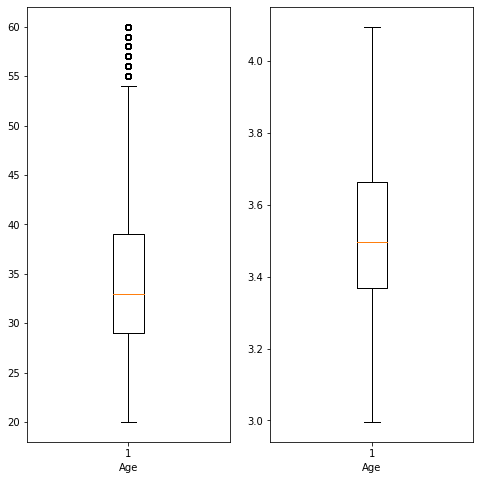

In [18]:
import numpy as np
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.boxplot([df['age']])
plt.xlabel('Age')
plt.subplot(122)
plt.boxplot([np.log(df['age'])])
plt.xlabel('Age')
plt.show()

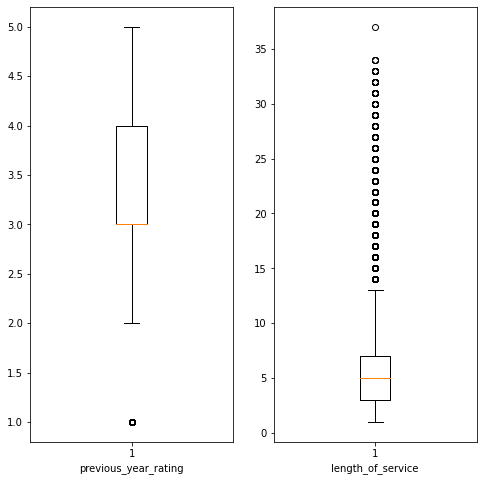

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.boxplot([df['previous_year_rating'].dropna()])
plt.xlabel('previous_year_rating')
plt.subplot(122)
plt.boxplot([df[ 'length_of_service']])
plt.xlabel( 'length_of_service')
plt.show()

# Filling missing value

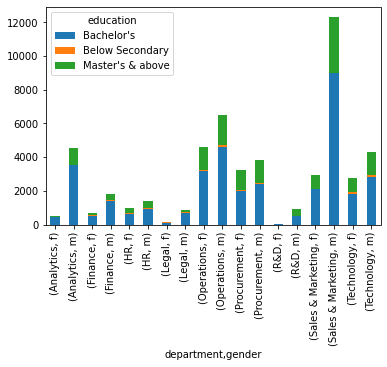

In [32]:
df.groupby(['department','gender'])['education'].value_counts().sort_index().unstack().plot(kind='bar',stacked=True)

### By this we can see that almost all the education is on the basis of bachelor's so we would fill the missing value for education for bachelor

In [6]:
df['education'].fillna("Bachelor's",inplace=True)

### The value for previous_year_rating would be absent because there might be those people who haven't entered in the company. 

In [7]:
df['previous_year_rating'].fillna(0.0,inplace=True)

In [8]:
import numpy as np
df['age_log']=np.log(df['age'])
df['no_of_trainings_log']=np.log(df['no_of_trainings'])
df['avg_training_score_log']=np.log(df['avg_training_score'])
df['length_of_service_log']=np.log(df['length_of_service'])

In [8]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_log,no_of_trainings_log,avg_training_score_log,length_of_service_log
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,3.555348,0.000000,3.891820,2.079442
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,3.401197,0.000000,4.094345,1.386294
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,3.526361,0.000000,3.912023,1.945910
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,3.663562,0.693147,3.912023,2.302585
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,3.806662,0.000000,4.290459,0.693147


In [9]:
dfnact=pd.get_dummies(df[['department','region','education','gender','recruitment_channel']],drop_first=True)

In [10]:
dfnact=dfnact.join(df[['no_of_trainings_log', 'age_log', 'previous_year_rating', 'length_of_service_log',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score_log', 'is_promoted']])

In [9]:
dfnact.columns

Index(['department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6',
       'region_region_7', 'region_region_8', 'region_region_9',
       'education_Below Secondary', 'education_Master's & above',

In [11]:
X=dfnact.drop('is_promoted',axis=1)
y=dfnact['is_promoted']

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X.values,y.values,train_size=0.7)

# Without any handling of missing values 

### Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

model=LogisticRegression()
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid={'C':c_values,'penalty':penalty}
cv=KFold(n_splits=3,random_state=False,shuffle=False)

clf=GridSearchCV(model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=KFold(n_splits=3, random_state=False, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [22]:
clf.best_params_

{'C': 100, 'penalty': 'l2'}

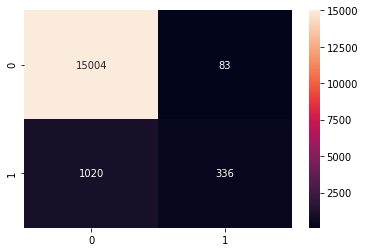

0.9329197834944961
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15087
           1       0.80      0.25      0.38      1356

    accuracy                           0.93     16443
   macro avg       0.87      0.62      0.67     16443
weighted avg       0.93      0.93      0.92     16443



In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
y_pred=clf.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=3)
tree_cv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [16]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 7}

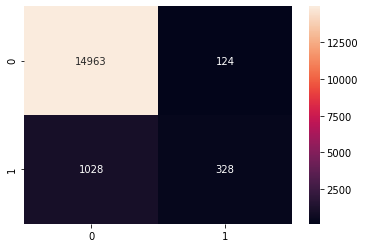

0.9299397920087575
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15087
           1       0.73      0.24      0.36      1356

    accuracy                           0.93     16443
   macro avg       0.83      0.62      0.66     16443
weighted avg       0.92      0.93      0.91     16443



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 
y_pred=tree_cv.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

# RF

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clfr = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = clfr, param_grid = param_grid, cv = 3, verbose=2)
rf_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=True, max_depth=2, max_features=aut

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=33, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=33, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=auto

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=41, total=   0.6s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=41 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=41, total=   0.6s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=41 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=41, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=48, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=True, max_depth=2, max_features=auto

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=64 
[CV]  bootstrap=True, max_depth=2, max_features=auto

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=64, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=64 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=64, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=72, total=   1.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=72, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80, total=   1.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=17, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41 
[CV]  bootstrap=True, max_depth=4, max_features=auto

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=41, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=41 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=41, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=True, max_depth=4, max_features=auto

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=64 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=64, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=64 
[CV]  bootstrap=True, max_depth=4, max_features=auto

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=64, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=72 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=72, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=72 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=72, total=   1.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=72 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=72, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80 
[CV]  bootstrap=True, max_depth=4, max_features=auto

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=17, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=17, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=17, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25, total=   0.6s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=33, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=33, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=33, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=41 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48, total=   0.9s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48, total=   0.9s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=64 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=64, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=64 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=64, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   1.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   1.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80, total=   1.5s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80, total=   1.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=17, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=17 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=17, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=17 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=17, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=33, total=   0.6s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=33, total=   0.6s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=33, total=   0.6s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=41 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=41, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=41 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=41, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   2.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=False, max_depth=2, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56, total=   1.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56, total=   1.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56, total=   1.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64, total=   1.9s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64 
[CV]  bootstrap=False, max_depth=4, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=64, total=   1.8s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=72 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=72, total=   2.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=72 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=72, total=   2.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=72 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=72, total=   1.9s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80 
[CV]  bootstrap=False, max_depth=4, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   2.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   2.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=4, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.6s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=False, max_depth=4, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, total=   0.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33, total=   1.0s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33, total=   0.9s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=41 
[CV]  bootstrap=False, max_depth=4, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=41, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=41 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=41, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=48, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=48, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=48 
[CV]  bootstrap=False, max_depth=4, max_feat

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=64 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=64, total=   1.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=64 
[CV]  bootstrap=False, max_depth=4, max_feat

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed: 14.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [41]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

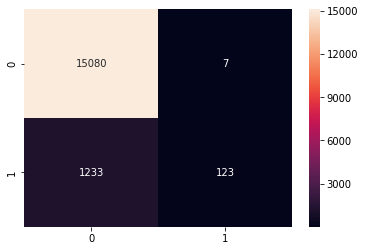

0.9245879705649821
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15087
           1       0.95      0.09      0.17      1356

    accuracy                           0.92     16443
   macro avg       0.94      0.55      0.56     16443
weighted avg       0.93      0.92      0.89     16443



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt 
y_pred=rf_grid.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb_grid = GridSearchCV(estimator = model, param_grid = params, cv = 3, verbose=2)
xgb_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, total=   3.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, total=   2.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, total=   2.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, total=   2.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, total=   2.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, total=   1.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_wei

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, total=   3.7s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, total=   3.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, total=   4.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, total=   3.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, total=   3.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, total=   5.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, total=   3.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, total=   3.4s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, total=   2.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, total=   2.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, 

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, total=   2.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, total=   3.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, total=   3.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, total=   3.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, total=   3.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8,

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, total=   2.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, total=   2.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, total=   2.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, total=   2.3s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, total=   2.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, total=   3.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, total=   3.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, total=   2.9s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, total=   3.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, total=   4.2s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=5, min_child_wei

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0, total=   2.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0, total=   2.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, total=   2.7s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, total=   3.3s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6, total=   4.6s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=1, subsample=0.

[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, total=   3.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, total=   3.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, total=   3.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, total=   3.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, total=   3.2s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsamp

[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, total=   2.9s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, total=   2.8s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, total=   2.9s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, total=   2.8s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, total=   3.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, 

[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, total=   3.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, total=   3.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, total=   2.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, total=   3.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, total=   2.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, total=   3.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, total=   3.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, total=   3.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, total=   3.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, total=   3.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=4, min_chil

[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, total=   2.9s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, total=   3.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, total=   2.9s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, total=   3.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, total=   4.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=0.6, 

[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, total=   3.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, total=   3.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, total=   3.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, total=   4.0s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6, total=   5.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsampl

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, total=   3.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, total=   3.3s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, total=   3.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, total=   3.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, total=   3.0s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, total=   4.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, total=   4.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, total=   4.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, total=   4.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, total=   4.4s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_wei

[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, total=   3.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, total=   3.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0, total=   3.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0, total=   3.0s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0, total=   3.3s
[CV] colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=4, min_child_weight=1, subsam

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, total=   3.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, total=   4.0s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, total=   3.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, total=   3.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, total=   3.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6

[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, total=   3.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, total=   7.2s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, total=   5.7s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, total=   4.8s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, total=   5.7s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, 

[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, total=   3.6s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, total=   3.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, total=   3.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, total=   3.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, total=   3.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, su

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, total=   4.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, total=   4.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, total=   4.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, total=   4.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, total=   4.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_wei

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6, total=   2.9s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, total=   3.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, total=   3.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, total=   3.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, total=   3.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, 

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, total=   5.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, total=   4.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, total=   4.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, total=   4.9s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, total=   4.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=10, subs

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, total=   3.3s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, total=   4.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, total=   4.2s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.8, total=   4.1s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, total=   3.1s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_wei

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, total=   5.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6, total=   5.9s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, total=   5.5s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, total=   5.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, total=   5.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_wei

[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, total=   3.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, total=   3.4s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, total=   3.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, total=   3.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, total=   3.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=10, subs

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, total=   4.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, total=   4.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, total=   4.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, total=   4.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, total=   4.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=5, subsample=1.0, 

[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6, total=   4.0s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6, total=   4.0s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, total=   4.1s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, total=   3.9s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=0.8, total=   4.0s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, 

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, total=   4.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6, total=   4.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, total=   4.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, total=   4.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, total=   4.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subs

[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed: 75.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8,

In [19]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1.5,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 1.0}

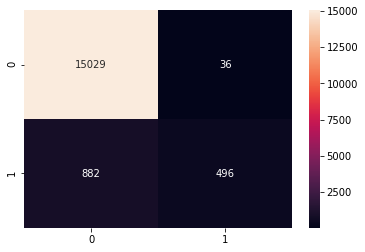

0.9441707717569786
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15065
           1       0.93      0.36      0.52      1378

    accuracy                           0.94     16443
   macro avg       0.94      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
y_pred=xgb_grid.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

#### Clearly we can see that XGBOOST is working efficiently than other ML model since ensemble model works much better in imbalenced dataset

### To handle imbalenced dataset we have 2 option based on current scenareo
<p><ul>OVER SAMPLING</ul></p>
<p><ul>SMORTING</ul></p>     

### Oversampling

In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os=RandomOverSampler(0.75)
X_train_os,y_train_os=os.fit_resample(xtrain,ytrain)
print("The number of classes before fit {}".format(Counter(ytrain)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 35157, 1: 3208})
The number of classes after fit Counter({0: 35157, 1: 26367})


C:\Users\luvdh\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


### Oversapmling - Logistic

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


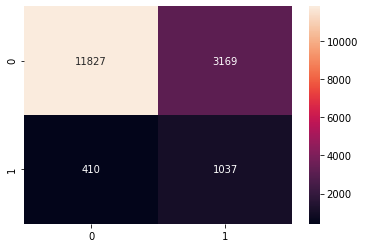

0.7823389892355409
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     14996
           1       0.25      0.72      0.37      1447

    accuracy                           0.78     16443
   macro avg       0.61      0.75      0.62     16443
weighted avg       0.90      0.78      0.82     16443



In [14]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(C= 100, penalty='l2')
logistic.fit(X_train_os,y_train_os)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=logistic.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### Oversapling - Decision Tree

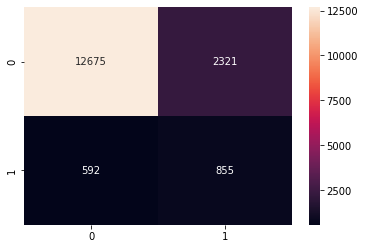

0.822842546980478
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     14996
           1       0.27      0.59      0.37      1447

    accuracy                           0.82     16443
   macro avg       0.61      0.72      0.63     16443
weighted avg       0.89      0.82      0.85     16443



In [15]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion= 'gini',max_depth= None, max_features= 8, min_samples_leaf= 7)
tree.fit(X_train_os,y_train_os)

y_pred=tree.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### Oversapling - Random Forest

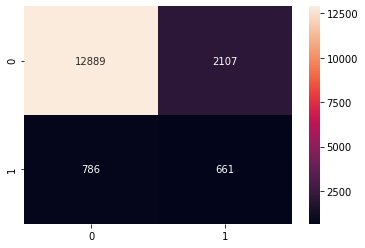

0.8240588700358815
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     14996
           1       0.24      0.46      0.31      1447

    accuracy                           0.82     16443
   macro avg       0.59      0.66      0.61     16443
weighted avg       0.88      0.82      0.85     16443



In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
 max_depth= 4,
 max_features ='auto',
 min_samples_leaf =2,
 min_samples_split= 2,
 n_estimators= 17)
rfc.fit(X_train_os,y_train_os)

y_pred=rfc.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### Oversampling -XGBC

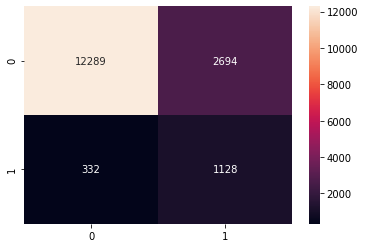

0.8159703217174481
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     14983
           1       0.30      0.77      0.43      1460

    accuracy                           0.82     16443
   macro avg       0.63      0.80      0.66     16443
weighted avg       0.91      0.82      0.85     16443



In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
xgb=XGBClassifier(colsample_bytree= 0.8, gamma =1.5, max_depth =4, min_child_weight =1, subsample= 1.0)
xgb.fit(X_train_os,y_train_os)

y_pred=xgb.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### SMOT

In [21]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(xtrain,ytrain)
print("The number of classes before fit {}".format(Counter(ytrain)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 35144, 1: 3221})
The number of classes after fit Counter({0: 34838, 1: 26052})


### SMOT - Logistic 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


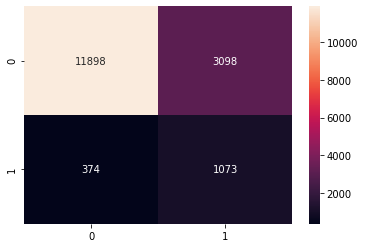

0.7888463175819498
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     14996
           1       0.26      0.74      0.38      1447

    accuracy                           0.79     16443
   macro avg       0.61      0.77      0.63     16443
weighted avg       0.91      0.79      0.83     16443



In [22]:
from sklearn.linear_model import LogisticRegression
logistic2=LogisticRegression(C= 100, penalty='l2')
logistic2.fit(X_train_ns,y_train_ns)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=logistic2.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### SMOT - Decision Tree

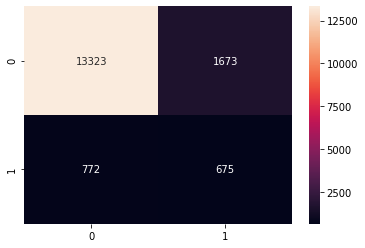

0.8513045064769202
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     14996
           1       0.29      0.47      0.36      1447

    accuracy                           0.85     16443
   macro avg       0.62      0.68      0.64     16443
weighted avg       0.89      0.85      0.87     16443



In [23]:
from sklearn.tree import DecisionTreeClassifier
tree2=DecisionTreeClassifier(criterion= 'gini',max_depth= None, max_features= 8, min_samples_leaf= 7)
tree2.fit(X_train_ns,y_train_ns)

y_pred=tree2.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### SMOT - Random Forest

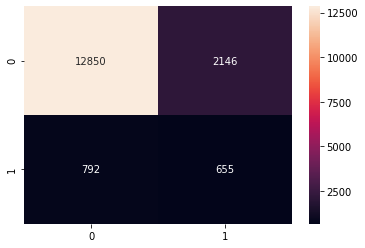

0.8213221431612237
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     14996
           1       0.23      0.45      0.31      1447

    accuracy                           0.82     16443
   macro avg       0.59      0.65      0.60     16443
weighted avg       0.88      0.82      0.85     16443



In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier(bootstrap= True,
 max_depth= 4,
 max_features ='auto',
 min_samples_leaf =2,
 min_samples_split= 2,
 n_estimators= 17)
rfc2.fit(X_train_ns,y_train_ns)

y_pred=rfc2.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### SMOT-XGBC

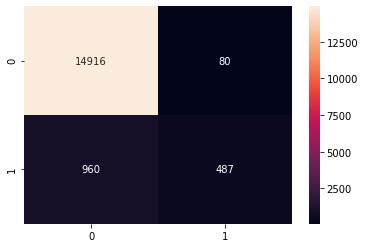

0.9367512011190172
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14996
           1       0.86      0.34      0.48      1447

    accuracy                           0.94     16443
   macro avg       0.90      0.67      0.72     16443
weighted avg       0.93      0.94      0.92     16443



In [26]:
from xgboost import XGBClassifier
xgb2=XGBClassifier(colsample_bytree= 0.8, gamma =1.5, max_depth =4, min_child_weight =1, subsample= 1.0)
xgb2.fit(X_train_ns,y_train_ns)

y_pred=xgb2.predict(xtest)
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True, fmt="d")
plt.show()
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

### By analyizing all of the above aspects we can conclude that we should take oversampling- XGBC as it is able to classify maximum no of 1's

# Dumping the model for deployment purpose

In [16]:
import pickle
pickle.dump(xgb, open("pima2.pickle.dat", "wb"))